In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("kag_risk_factors_cervical_cancer.csv")

In [3]:
data['STDs: Time since first diagnosis'] = data['STDs: Time since first diagnosis'].replace('?','0')
data['STDs: Time since last diagnosis'] = data['STDs: Time since last diagnosis'].replace('?','0')
data = data.replace('?', np.nan)

In [4]:
#PCA to extract principal values
principal_columns = data[['Age',"STDs: Number of diagnosis"]].values
pca = PCA(n_components=1)
principal_columns = pca.fit_transform(principal_columns)
data["pca"] = principal_columns

In [5]:
data = data.astype('float64')

In [6]:
data = data.fillna(data.mean())

In [7]:
data=data.drop_duplicates()

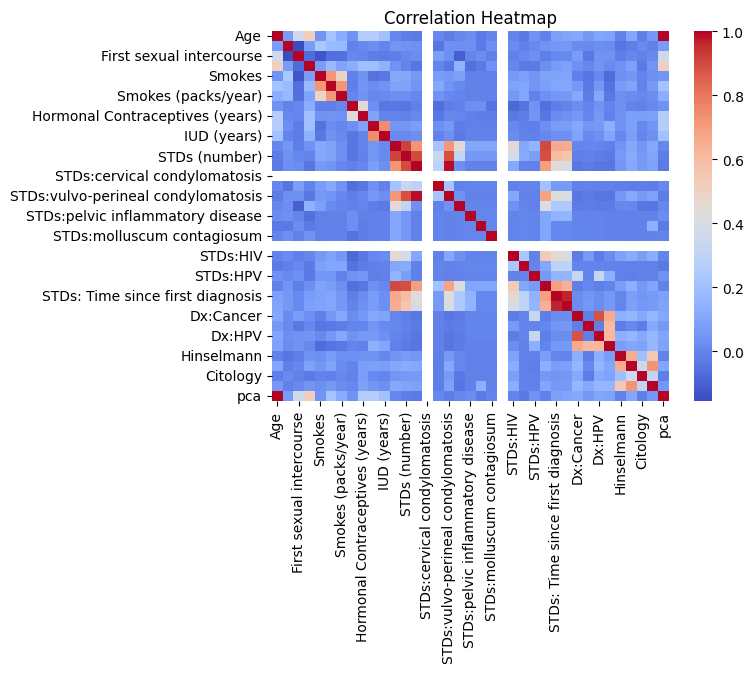

In [8]:
relation_graph = data.corr()
sns.heatmap(relation_graph,cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [9]:
tg = ["Hinselmann",'Schiller','Citology','Biopsy']

In [10]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import ADASYN,SMOTE

In [11]:
def SVM(X_train, X_test, Y_train, Y_test):
    SVM_clf = SVC(kernel= 'rbf',C=1.0, random_state=42)
    SVM_clf.fit(X_train, Y_train)
    return SVM_clf

In [12]:
def KNN(X_train, X_test, Y_train, Y_test):
    KNN_clf = KNeighborsClassifier(n_neighbors=3)
    KNN_clf.fit(X_train, Y_train)
    return KNN_clf

In [13]:
def cof_graph(Y_test,Y_pred):
    cof = confusion_matrix(Y_test, Y_pred)
    sns.heatmap(cof, annot=True, cmap='Reds')
    plt.xlabel('Predicted values')
    plt.ylabel('True Values')
    plt.title('Confusion Matrix')
    plt.show()

Hinselmann

In [14]:
X = np.array(data.drop(columns=tg))
Y = np.array(data[tg[0]])

In [15]:
balance = SMOTE()
X, Y = balance.fit_resample(X, Y)

In [16]:
normalize = MinMaxScaler()
X = np.array(normalize.fit_transform(X))

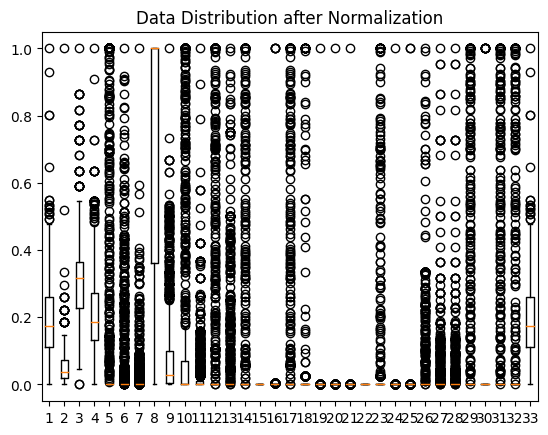

In [17]:
plt.boxplot(X)
plt.title('Data Distribution after Normalization')
plt.show()

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, shuffle=True)

In [19]:
svm = SVM(x_train, x_test, y_train, y_test)
y_pred = svm.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.7475
Precision: 0.6848249027237354
Recall: 0.8979591836734694


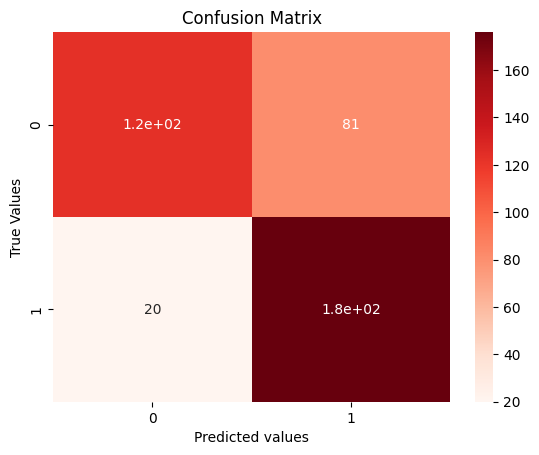

In [20]:
cof_graph(y_test,y_pred)

In [21]:
knn = KNN(x_train, x_test, y_train, y_test)
y_pred = knn.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.915
Precision: 0.8616071428571429
Recall: 0.9846938775510204


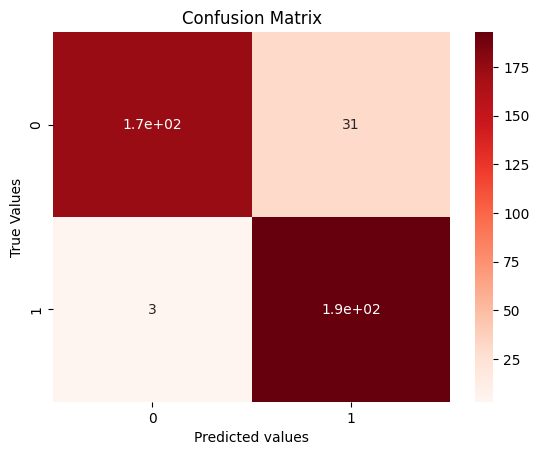

In [22]:
cof_graph(y_test,y_pred)

Schiller

In [23]:
X = np.array(data.drop(columns=tg))
Y = np.array(data[tg[1]])

In [24]:
balance = SMOTE()
X, Y = balance.fit_resample(X, Y)

In [25]:
normalize = MinMaxScaler()
X = np.array(normalize.fit_transform(X))

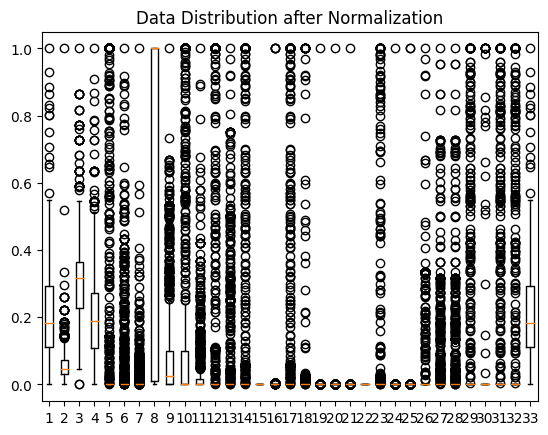

In [26]:
plt.boxplot(X)
plt.title('Data Distribution after Normalization')
plt.show()

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, shuffle=True)

In [28]:
svm = SVM(x_train, x_test, y_train, y_test)
y_pred = svm.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.6876640419947506
Precision: 0.8625954198473282
Recall: 0.5280373831775701


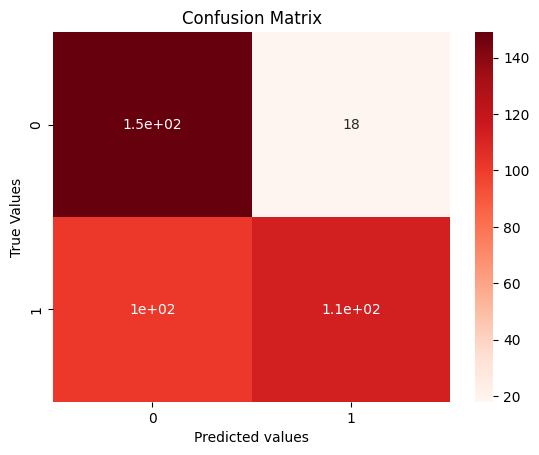

In [29]:
cof_graph(y_test,y_pred)

In [30]:
knn = KNN(x_train, x_test, y_train, y_test)
y_pred = knn.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.8766404199475065
Precision: 0.8553191489361702
Recall: 0.9392523364485982


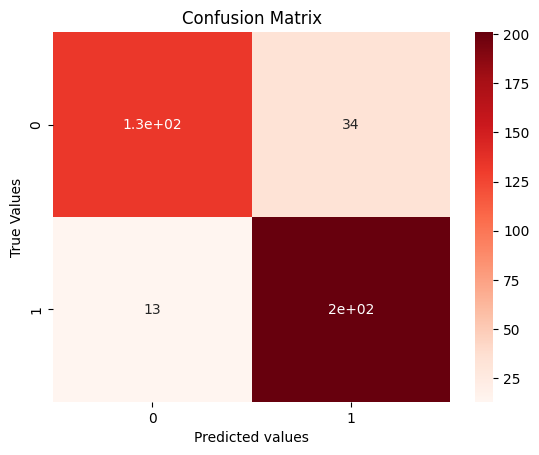

In [31]:
cof_graph(y_test,y_pred)

Citology

In [32]:
X = np.array(data.drop(columns=tg))
Y = np.array(data[tg[2]])

In [33]:
balance = SMOTE()
X, Y = balance.fit_resample(X, Y)

In [34]:
normalize = MinMaxScaler()
X = np.array(normalize.fit_transform(X))

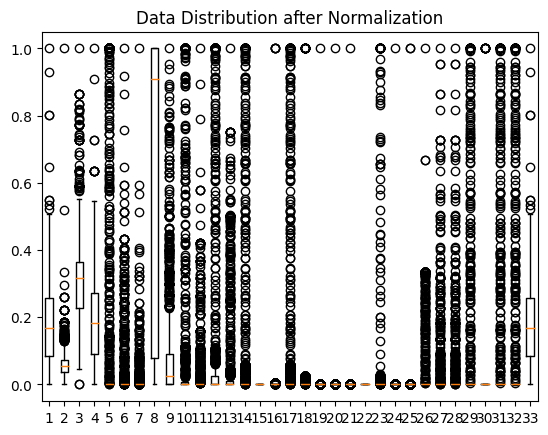

In [35]:
plt.boxplot(X)
plt.title('Data Distribution after Normalization')
plt.show()

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, shuffle=True)

In [37]:
svm = SVM(x_train, x_test, y_train, y_test)
y_pred = svm.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.7651515151515151
Precision: 0.7477064220183486
Recall: 0.8109452736318408


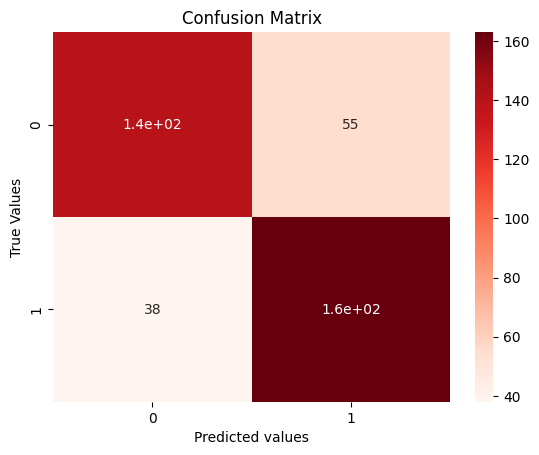

In [38]:
cof_graph(y_test,y_pred)

In [39]:
knn = KNN(x_train, x_test, y_train, y_test)
y_pred = knn.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.9141414141414141
Precision: 0.8678414096916299
Recall: 0.9800995024875622


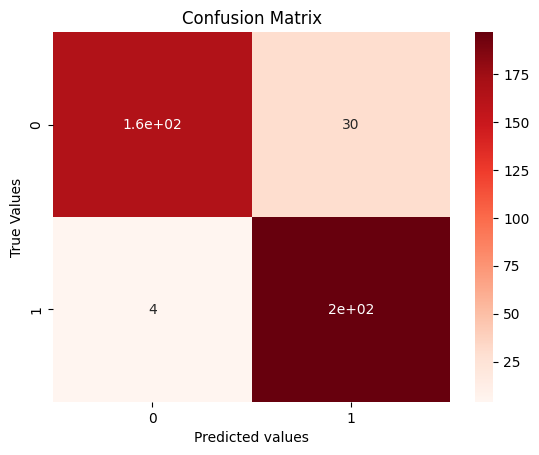

In [40]:
cof_graph(y_test,y_pred)

Biopsy

In [41]:
X = np.array(data.drop(columns=tg))
Y = np.array(data[tg[3]])

In [42]:
balance = SMOTE()
X, Y = balance.fit_resample(X, Y)

In [43]:
normalize = MinMaxScaler()
X = np.array(normalize.fit_transform(X))

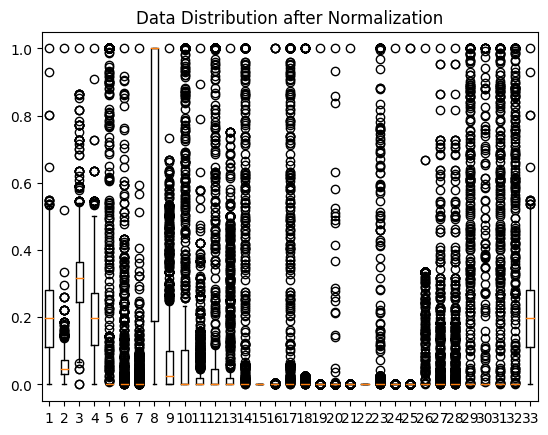

In [44]:
plt.boxplot(X)
plt.title('Data Distribution after Normalization')
plt.show()

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, shuffle=True)

In [46]:
svm = SVM(x_train, x_test, y_train, y_test)
y_pred = svm.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.7877237851662404
Precision: 0.9130434782608695
Recall: 0.6395939086294417


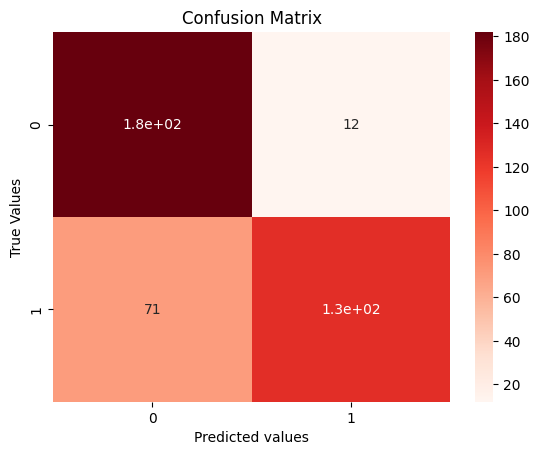

In [47]:
cof_graph(y_test,y_pred)

In [48]:
knn = KNN(x_train, x_test, y_train, y_test)
y_pred = knn.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.9104859335038363
Precision: 0.8648648648648649
Recall: 0.9746192893401016


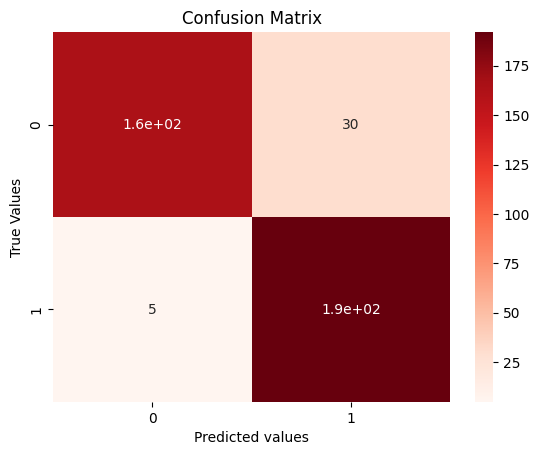

In [49]:
cof_graph(y_test,y_pred)